### 1. Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

In [30]:
from datetime import datetime
from concurrent import futures
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import numpy as np

In [31]:
cd C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam

C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam


In [32]:
import os
os.getcwd()

'C:\\Users\\kundankesidi\\Desktop\\Programming for data science\\Mid Term Exam'

In [33]:
### initializes the current time and start time.  Right now it is set for 5 years of data
now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

In [46]:
def download_stock(stock):
    """ try to query the iex for a stock, if failed note with print """
    try:
        print(stock)
        stock_df = pdr.get_data_yahoo(stock, start_time, now_time)
        stock_df['Name'] = stock
        stock_df.columns = [str(col) + stock for col in stock_df.columns]
        output_name = stock + '_data.csv'
        stock_df.to_csv(output_name)
    except:
        bad_names.append(stock)
        print('bad: %s' % (stock))
        
if __name__ == '__main__':

    """ set the download window """
    now_time = datetime.now()
    start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

    """ list of s_and_p companies """
    s_and_p = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
        'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
        'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
        'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
        'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
        'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
        'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
        'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
        'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
        'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
        'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
        'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
        'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
        'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
        'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
        'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
        'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
        'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
        'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
        'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
        'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
        'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
        'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
        'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
        'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
        'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
        'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
        'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
        'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
        'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
        'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
        'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
        'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
        'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
        'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
        'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
        'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
        'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
        'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

    bad_names =[] #to keep track of failed queries

    """here we use the concurrent.futures module's ThreadPoolExecutor
        to speed up the downloads buy doing them in parallel 
        as opposed to sequentially """

    #set the maximum thread number
    max_workers = 1

    workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
    with futures.ThreadPoolExecutor(workers) as executor:
        res = executor.map(download_stock, s_and_p)


    """ Save failed queries to a text file to retry """
    if len(bad_names) > 0:
        with open('failed_queries.txt','w') as outfile:
            for name in bad_names:
                outfile.write(name+'\n')

    #timing:
    finish_time = datetime.now()
    duration = finish_time - now_time
    minutes, seconds = divmod(duration.seconds, 60)
    print('getSandP_threaded.py')
    print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')


MMM
[*********************100%***********************]  1 of 1 downloaded
ABT
[*********************100%***********************]  1 of 1 downloaded
ABBV
[*********************100%***********************]  1 of 1 downloaded
ACN
[*********************100%***********************]  1 of 1 downloaded
ATVI
[*********************100%***********************]  1 of 1 downloaded
AYI
[*********************100%***********************]  1 of 1 downloaded
ADBE
[*********************100%***********************]  1 of 1 downloaded
AMD
[*********************100%***********************]  1 of 1 downloaded
AAP
[*********************100%***********************]  1 of 1 downloaded
AES
[*********************100%***********************]  1 of 1 downloaded
AET
[*********************100%***********************]  1 of 1 downloaded
AMG
[*********************100%***********************]  1 of 1 downloaded
AFL
[*********************100%***********************]  1 of 1 downloaded
A
[*********************100%*******

[*********************100%***********************]  1 of 1 downloaded
XEC
[*********************100%***********************]  1 of 1 downloaded
CINF
[*********************100%***********************]  1 of 1 downloaded
CTAS
[*********************100%***********************]  1 of 1 downloaded
CSCO
[*********************100%***********************]  1 of 1 downloaded
C
[*********************100%***********************]  1 of 1 downloaded
CFG
[*********************100%***********************]  1 of 1 downloaded
CTXS
[*********************100%***********************]  1 of 1 downloaded
CLX
[*********************100%***********************]  1 of 1 downloaded
CME
[*********************100%***********************]  1 of 1 downloaded
CMS
[*********************100%***********************]  1 of 1 downloaded
KO
[*********************100%***********************]  1 of 1 downloaded
CTSH
[*********************100%***********************]  1 of 1 downloaded
CL
[*********************100%***********

[*********************100%***********************]  1 of 1 downloaded
NFLX
[*********************100%***********************]  1 of 1 downloaded
NWL
[*********************100%***********************]  1 of 1 downloaded
NFX
[*********************100%***********************]  1 of 1 downloaded
NEM
[*********************100%***********************]  1 of 1 downloaded
NWSA
[*********************100%***********************]  1 of 1 downloaded
NWS
[*********************100%***********************]  1 of 1 downloaded
NEE
[*********************100%***********************]  1 of 1 downloaded
NLSN
[*********************100%***********************]  1 of 1 downloaded
NKE
[*********************100%***********************]  1 of 1 downloaded
NI
[*********************100%***********************]  1 of 1 downloaded
NBL
[*********************100%***********************]  1 of 1 downloaded
JWN
[*********************100%***********************]  1 of 1 downloaded
NSC
[*********************100%**********

In [1]:
import csv
import glob
import os

In [2]:
#merge all csv files vertically

path = '.'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for filenames in files_in_dir:
    df = pd.read_csv(filenames)
    df.to_csv('AllStocks.csv', mode='a')

In [9]:
cd C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam\stock-time-series-20050101-to-20171231 (1)


C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam\stock-time-series-20050101-to-20171231 (1)


In [10]:
import os
os.getcwd()

'C:\\Users\\kundankesidi\\Desktop\\Programming for data science\\Mid Term Exam\\stock-time-series-20050101-to-20171231 (1)'

In [4]:
import csv
import glob
import os

In [12]:
import pandas as pd

interesting_files = glob.glob("*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in interesting_files), axis=1)
df.to_csv("output.csv")

In [13]:
df1 = df.copy()

In [14]:
df1.dropna(axis=1, how='all', inplace=True)

In [15]:
df1.head()

,Date,OpenAAL,HighAAL,LowAAL,CloseAAL,Adj CloseAAL,VolumeAAL,NameAAL,Date,OpenAAPL,...,VolumeZION,NameZION,Date,OpenZTS,HighZTS,LowZTS,CloseZTS,Adj CloseZTS,VolumeZTS,NameZTS
0,2013-10-11,20.500000,20.730000,20.420000,20.719999,19.904251,3503300,AAL,2013-10-11,69.570000,...,2529100,ZION,2013-10-11,32.439999,32.770000,32.029999,32.400002,31.109175,6164800,ZTS
1,2013-10-14,20.520000,20.670000,20.260000,20.580000,19.769762,3066400,AAL,2013-10-14,69.975716,...,1456800,ZION,2013-10-14,32.029999,32.459999,31.860001,32.290001,31.003553,2527800,ZTS
2,2013-10-15,20.639999,20.830000,20.320000,20.500000,19.692907,3089000,AAL,2013-10-15,71.072861,...,2679600,ZION,2013-10-15,32.220001,32.419998,32.000000,32.070000,30.792318,2326600,ZTS
3,2013-10-16,20.570000,20.730000,20.450001,20.620001,19.808186,3478800,AAL,2013-10-16,71.541428,...,1649500,ZION,2013-10-16,32.259998,32.970001,32.259998,32.889999,31.579645,3625900,ZTS
4,2013-10-17,20.719999,21.059999,20.639999,21.000000,20.173223,4487000,AAL,2013-10-17,71.425713,...,1731100,ZION,2013-10-17,32.830002,33.189999,32.770000,33.029999,31.714067,2891500,ZTS


Here, happened to remove some of the files, because it had very difficulty in loading large number of files and running. Thus the reason the number of columns are less. The actual number of columns were about 3900 above

### 2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

Instead of taking all the files, I considered the stocks of amazon, google and apple. Here, I ran the stocks analysis for different time periods between 2006-2018

In [303]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline

In [304]:
cd C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam\waste

C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam\waste


In [305]:
import os
os.getcwd()

'C:\\Users\\kundankesidi\\Desktop\\Programming for data science\\Mid Term Exam\\waste'

In [306]:
Allstock = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

#### Analyze the AAPL stock price data

In [307]:
aapl = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [308]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [309]:

aapl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [310]:
aapl.set_index('Date', inplace=True)

#### Create a 3-D plot view of 2009 for Apple Stock prices

Text(0.5,0,'Lowest Value')

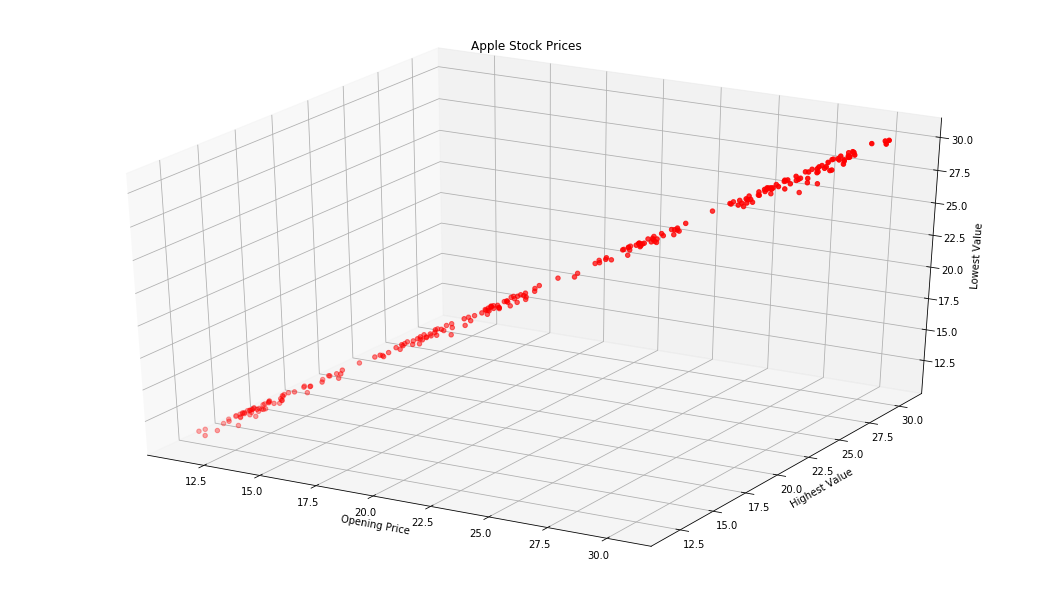

In [311]:
# Importing reqired libraries
from mpl_toolkits.mplot3d import Axes3D

# Plotting
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111,title="Apple Stock Prices",projection='3d')
aapl.reset_index(inplace=True)
aapl2 = aapl[(aapl['Date']>='2009-01-01') & (aapl['Date']<='2010-01-01')]
X=aapl2[['Open']]
Y=aapl2[['High']]
Z=aapl2[['Low']]
ax.scatter(X,Y,Z,c='r',marker='o')
ax.set_xlabel('Opening Price')
ax.set_ylabel('Highest Value')
ax.set_zlabel('Lowest Value')

#### Creating the 3-D plot view of amazon and google for the year 2009

Text(0.5,0,'Lowest Value')

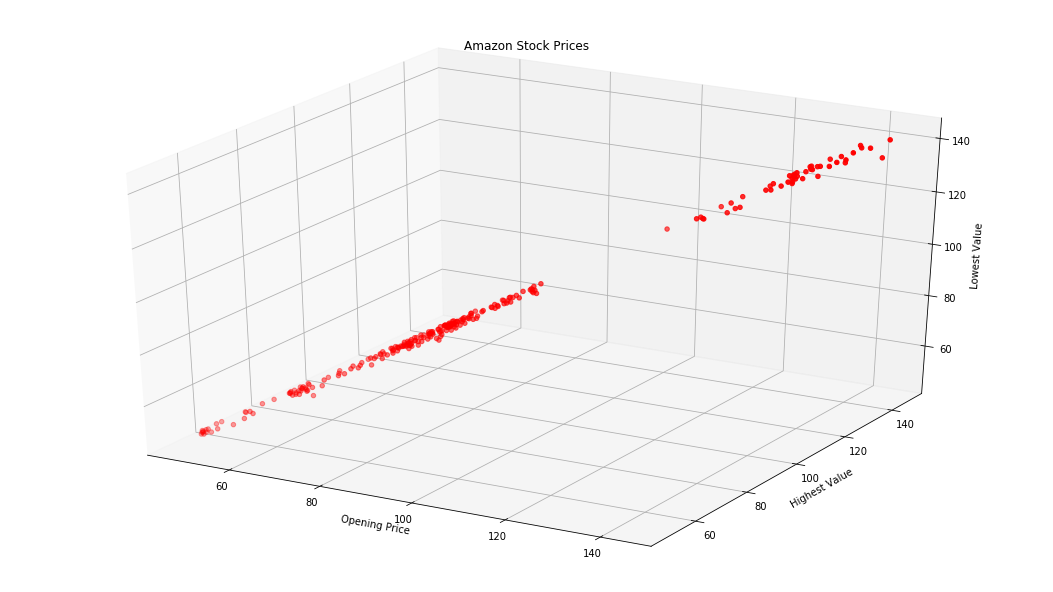

In [312]:
# Importing reqired libraries
from mpl_toolkits.mplot3d import Axes3D

# Plotting
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111,title="Amazon Stock Prices",projection='3d')
amzn.reset_index(inplace=True)
amzn2 = amzn[(amzn['Date']>='2009-01-01') & (amzn['Date']<='2010-01-01')]
X=amzn2[['Open']]
Y=amzn2[['High']]
Z=amzn2[['Low']]
ax.scatter(X,Y,Z,c='r',marker='o')
ax.set_xlabel('Opening Price')
ax.set_ylabel('Highest Value')
ax.set_zlabel('Lowest Value')

Text(0.5,0,'Lowest Value')

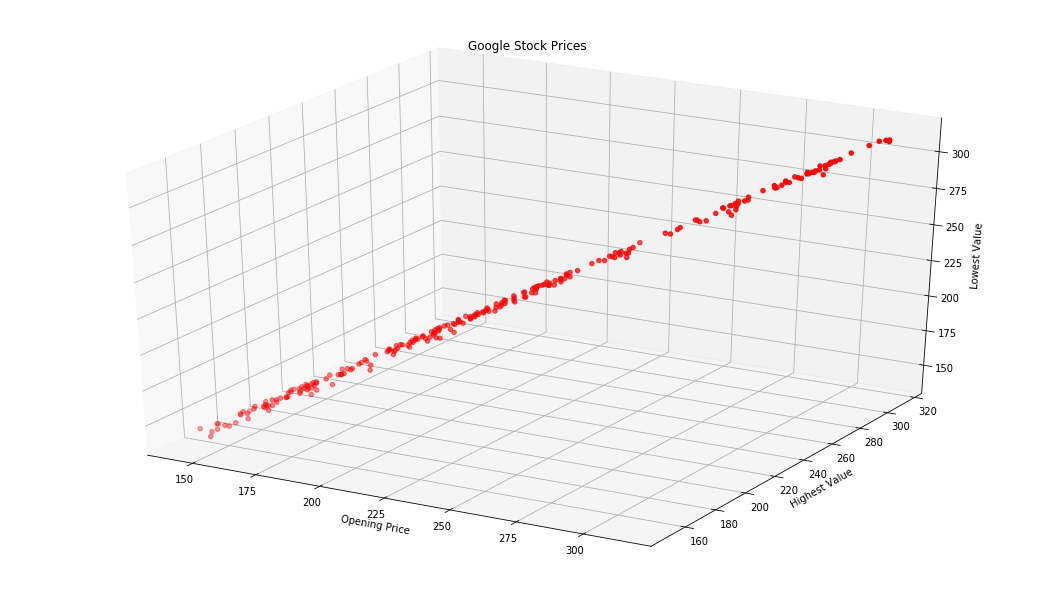

In [300]:
# Importing reqired libraries
from mpl_toolkits.mplot3d import Axes3D

# Plotting
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax=fig.add_subplot(111,title="Google Stock Prices",projection='3d')
googl.reset_index(inplace=True)
googl2 = googl[(googl['Date']>='2009-01-01') & (googl['Date']<='2010-01-01')]
X=googl2[['Open']]
Y=googl2[['High']]
Z=googl2[['Low']]
ax.scatter(X,Y,Z,c='r',marker='o')
ax.set_xlabel('Opening Price')
ax.set_ylabel('Highest Value')
ax.set_zlabel('Lowest Value')

#### Comparing the stock prices of Apple, Google and Amazon

In [313]:
# Reading the Stock price data
googl = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
amzn = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
googl.set_index('Date', inplace=True)
aapl.set_index('Date', inplace=True)
amzn.set_index('Date', inplace=True)
stocks = pd.DataFrame({"AAPL": aapl["Close"],
                      "AMZN": amzn["Close"],
                      "GOOG": googl["Close"]})
     
stocks.head(10)

,AAPL,AMZN,GOOG
Date,,,
2006-01-03,10.68,47.58,217.83
2006-01-04,10.71,47.25,222.84
2006-01-05,10.63,47.65,225.85
2006-01-06,10.90,47.87,233.06
2006-01-09,10.86,47.08,233.68
2006-01-10,11.55,45.65,235.11
2006-01-11,11.99,44.93,236.05
2006-01-12,12.04,44.36,232.05
2006-01-13,12.23,44.40,233.36


In [314]:
googl.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [315]:
amzn.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [316]:
aapl.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Text(0,0.5,'Stock Price')

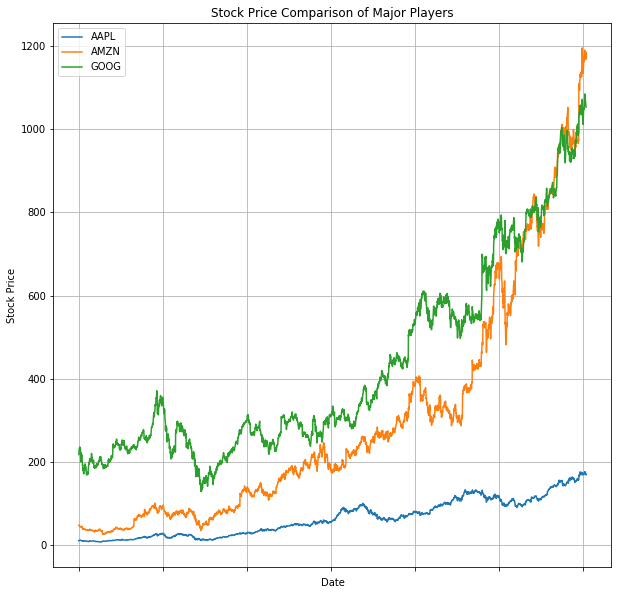

In [317]:
# Plotting
ax = stocks.plot(grid = True,figsize=(10,10), title="Stock Price Comparison of Major Players")
ax.set_ylabel("Stock Price")

### Let us use the regression plot, as the previous plot shows high correlation between Amazon and Google stock prices

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

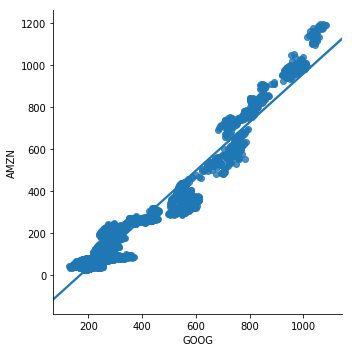

In [319]:
# Using the Seaborn lmplot
sns.lmplot(x='GOOG',y='AMZN',data=stocks)

### Comparing Stock Volumes of Apple, Google and Amazon traded per day for December 2017

In [320]:
googl = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
aapl = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
amzn = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
googl.set_index('Date', inplace=True)
aapl.set_index('Date', inplace=True)
amzn.set_index('Date', inplace=True)
volumes = pd.DataFrame({"AAPL": aapl["Volume"],
                      "AMZN": amzn["Volume"],
                      "GOOG": googl["Volume"]})

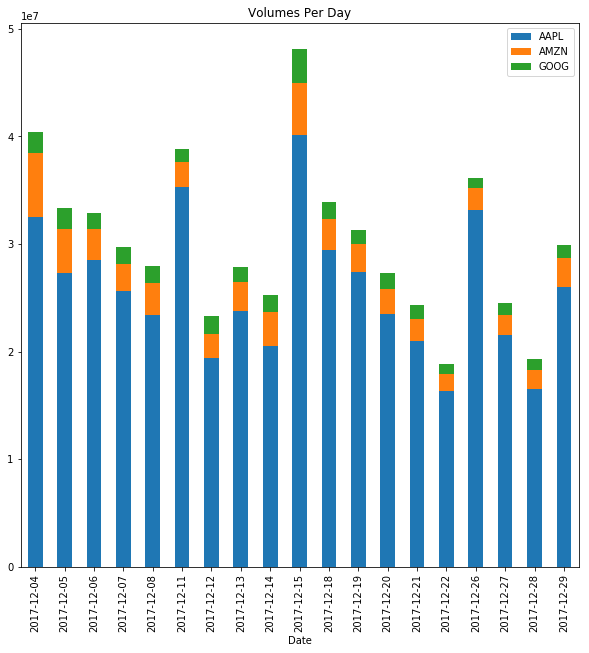

In [321]:
# Plotting 
volumes.reset_index(inplace=True)
volumes2 = volumes[volumes['Date']>'2017-12-01']
volumes2.set_index('Date',inplace=True)
volumes2.plot.bar(stacked=True,figsize=(10,10), title="Volumes Per Day")

Looking at the graph, we can depict that the average number of stocks traded by Apple in december 2017 is way too higher than that of the Amazon and Google

### Let us now consider the volume of stocks traded per the year 2015

In [322]:
googl = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
aapl = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
amzn = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
googl.set_index('Date', inplace=True)
aapl.set_index('Date', inplace=True)
amzn.set_index('Date', inplace=True)
volumes = pd.DataFrame({"AAPL": aapl["Volume"],
                      "AMZN": amzn["Volume"],
                      "GOOG": googl["Volume"]})

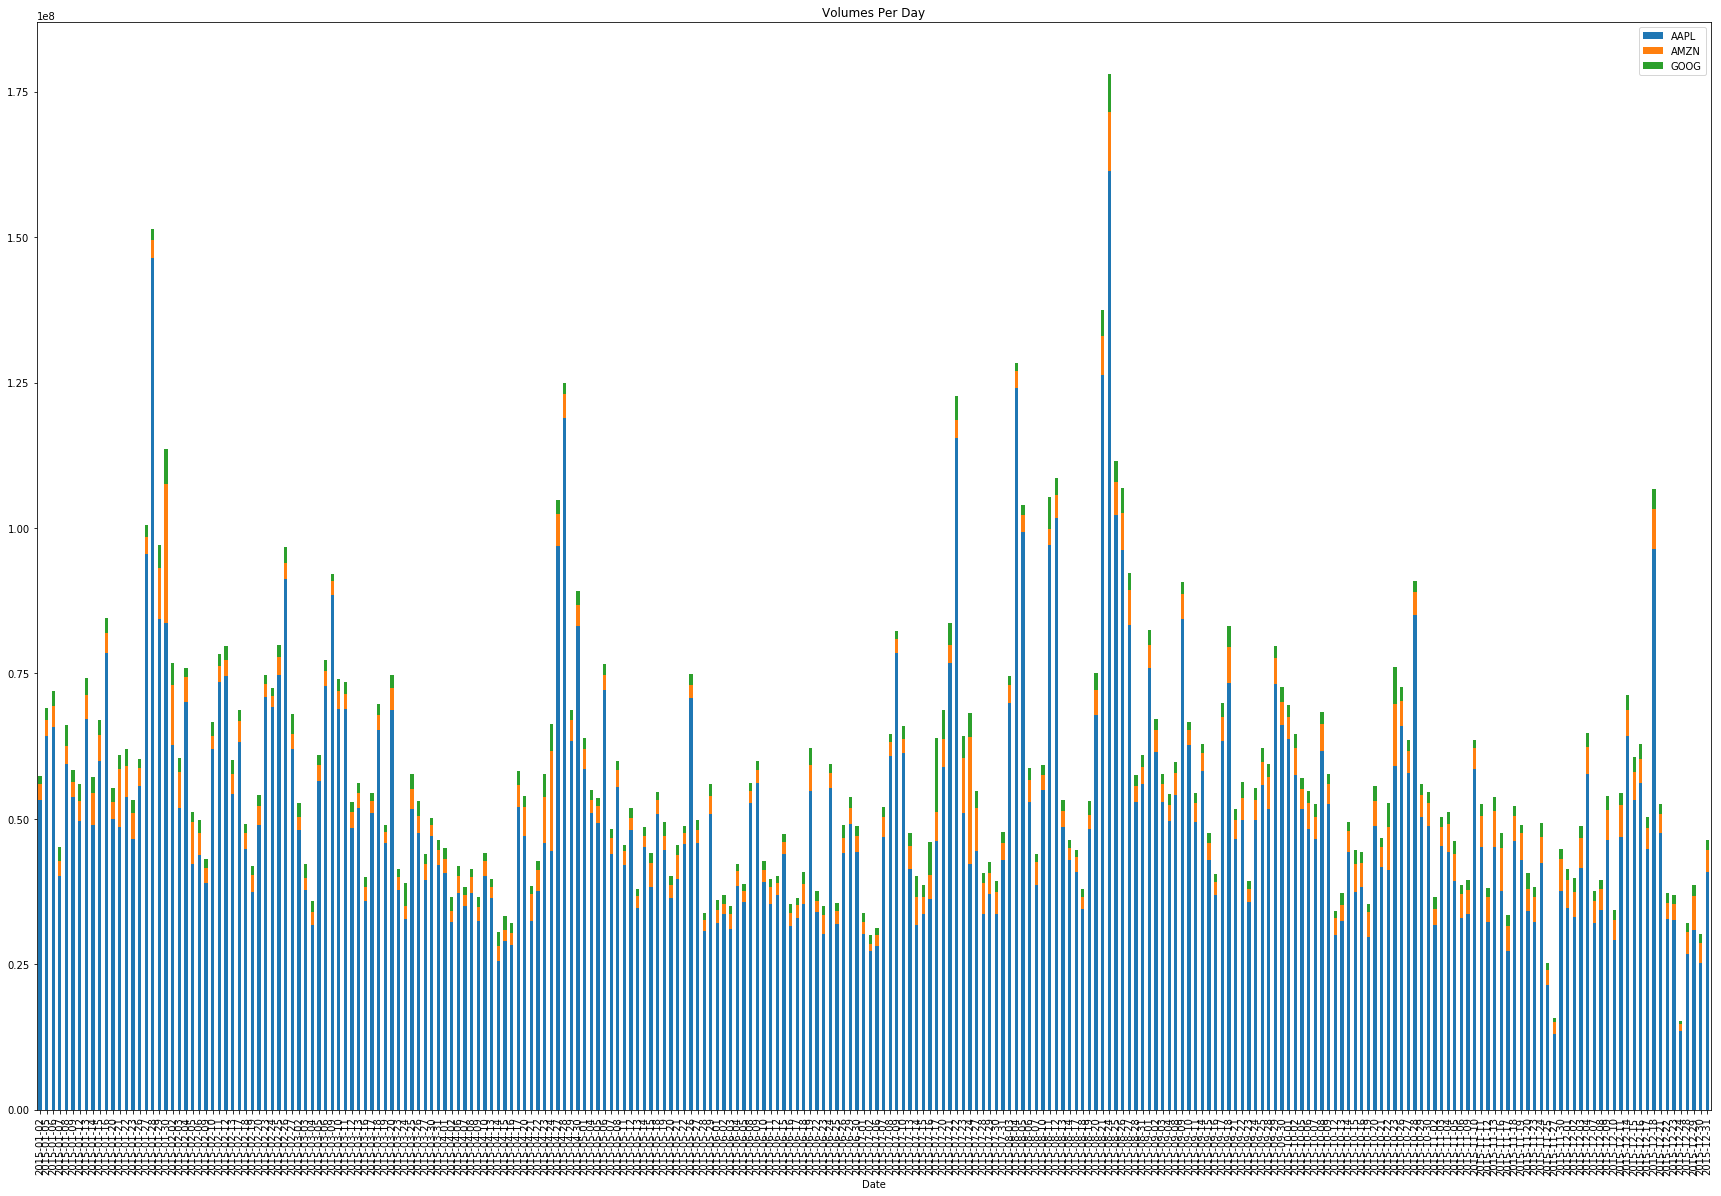

In [323]:
# Plotting 
volumes.reset_index(inplace=True)
volumes2 = volumes[(volumes['Date']>='2015-01-01') & (volumes['Date']<='2016-01-01')]
volumes2.set_index('Date',inplace=True)
volumes2.plot.bar(stacked=True,figsize=(30,20), title="Volumes Per Day")

Looking at this graph, still we can say that Apple has traded more stocks in the year 2015. Looking at the volume of stocks traded overall, Apple has traded the highest number of stock of all time, while amazon and google has done equal trading over the years

### Comparing the major stocks in 2017 using different facet grids

In [324]:
# reading the data for all stocks of 2017
Allstock = pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')

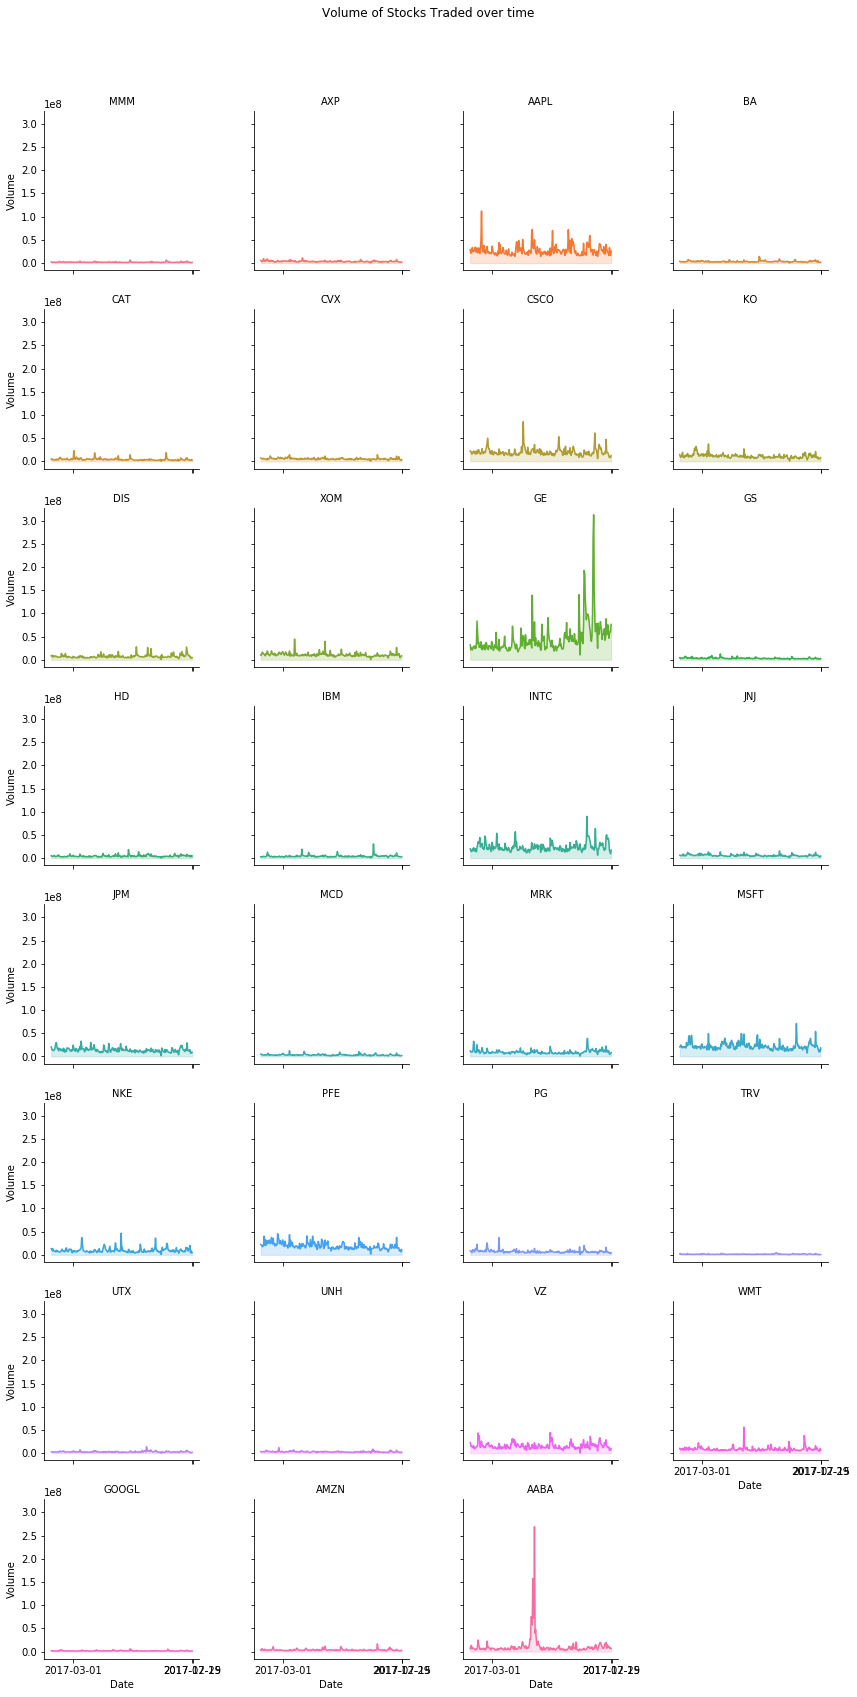

In [325]:
# Subsetting the data
Allstock2 = Allstock[Allstock['Date']>='2017-01-01'][['Volume','Date','Name']]

# Plotting the data Using Facet Grid
g = sns.FacetGrid(Allstock2, col='Name', hue='Name', col_wrap=4 )
g = g.map(plt.plot, 'Date', 'Volume')
g = g.map(plt.fill_between, 'Date', 'Volume', alpha=0.2).set_titles("{col_name} Name")
g = g.set_titles("{col_name}")
g = g.set(xticks=['2017-03-01','2017-07-15','2017-12-29'])
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Volume of Stocks Traded over time')

Looking at the facet grid, the volume of stocks of INTC is very high

### Moving averages of Google, Apple and Amazon stock closing prices from September to December 2017

In [326]:
import pandas as pd

In [327]:
## checking the version
pd.__version__

'0.23.0'

In [328]:
googl.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


<Figure size 2772x1476 with 0 Axes>

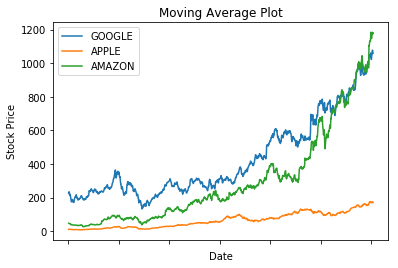

In [329]:
first_data = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
first_data2 = first_data[first_data['Date']>='2017-09-01']
date_range = first_data2['Date']
second_data = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
second_data2 = second_data[second_data['Date']>='2017-09-01']
date_range = second_data2['Date']
third_data = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
third_data2 = third_data[third_data['Date']>='2017-09-01']
date_range = third_data2['Date']
first_data['GOOGLE'] = first_data['Close'].rolling(4).mean()
second_data['APPLE'] = second_data['Close'].rolling(4).mean()
third_data['AMAZON'] = third_data['Close'].rolling(4).mean()
# Plotting the Moving average Plot
fig = plt.figure()
fig.set_size_inches(38.5, 20.5)
ax.plot(date_range,first_data2['Close'].values,label="Original")
fig.autofmt_xdate(rotation=90)
ax = first_data.plot(x="Date", y=["GOOGLE"], title ="Moving Average Plot")
second_data.plot(x="Date", y=["APPLE"], ax=ax)
third_data.plot(x="Date", y=["AMAZON"], ax=ax)
ax.set_ylabel("Stock Price")
plt.show()

The moving average of Google is better than that of the amazon and apple

<Figure size 2772x1476 with 0 Axes>

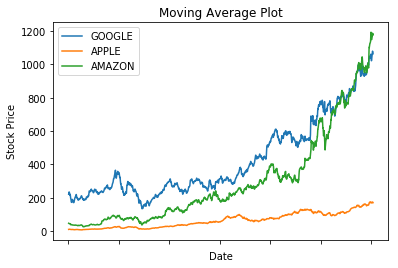

In [330]:
first_data = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
first_data2 = first_data[(first_data['Date']>='2013-03-01') & (first_data['Date']<='2015-06-01')]
date_range = first_data2['Date']
second_data = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
second_data2 = second_data[(second_data['Date']>='2013-03-01') & (second_data['Date']>='2015-06-01')]
date_range = second_data2['Date']
third_data = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
third_data2 = third_data[(third_data['Date']>='2013-03-01') & (second_data['Date']>='2015-06-01')]
date_range = third_data2['Date']
first_data['GOOGLE'] = first_data['Open'].rolling(4).mean()
second_data['APPLE'] = second_data['Open'].rolling(4).mean()
third_data['AMAZON'] = third_data['Open'].rolling(4).mean()
# Plotting the Moving average Plot
fig = plt.figure()
fig.set_size_inches(38.5, 20.5)
ax = first_data.plot(x="Date", y=["GOOGLE"], title ="Moving Average Plot")
second_data.plot(x="Date", y=["APPLE"], ax=ax)
third_data.plot(x="Date", y=["AMAZON"], ax=ax)
ax.set_ylabel("Stock Price")
plt.show()

The moving average plot of the stock file doesn't change much with the years here. The Google stock averages can be considered best than that of the amazon and apple

### Autocorrelation of google, amazon and apple stocks

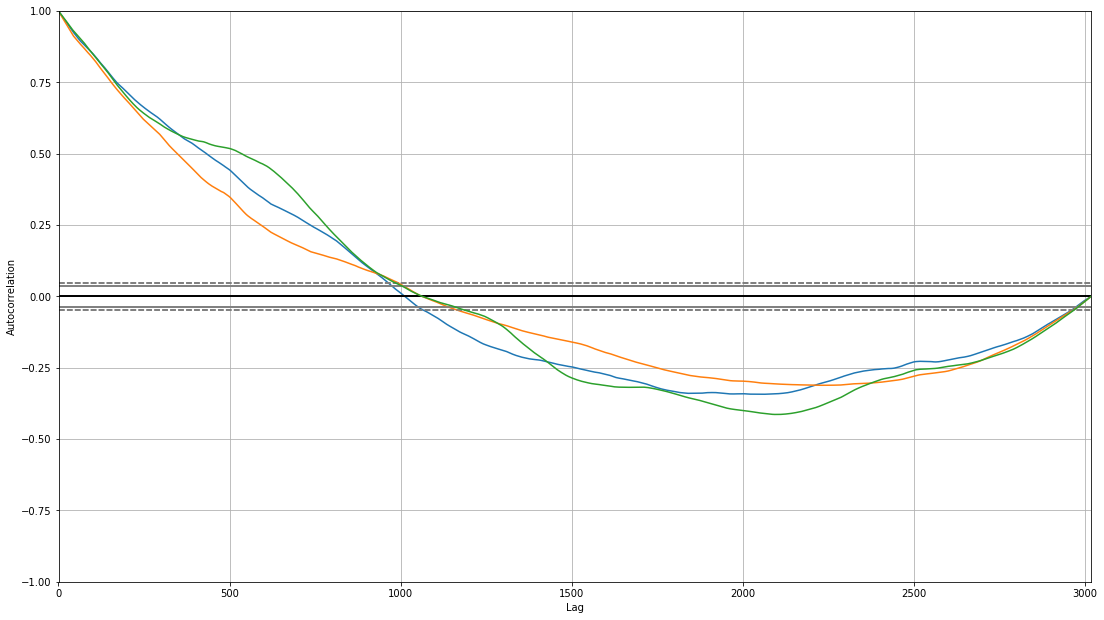

In [206]:
# Importing autocorrelation_plot 
from pandas.plotting import autocorrelation_plot

# Plotting the Autocorrelation plot using the closing value of Google stock, amazon and apple stocks
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
autocorrelation_plot(googl['Close'])
autocorrelation_plot(amzn['Close'])
autocorrelation_plot(aapl['Close'])

### Returns of Google, Amazon and Apple stocks 2017

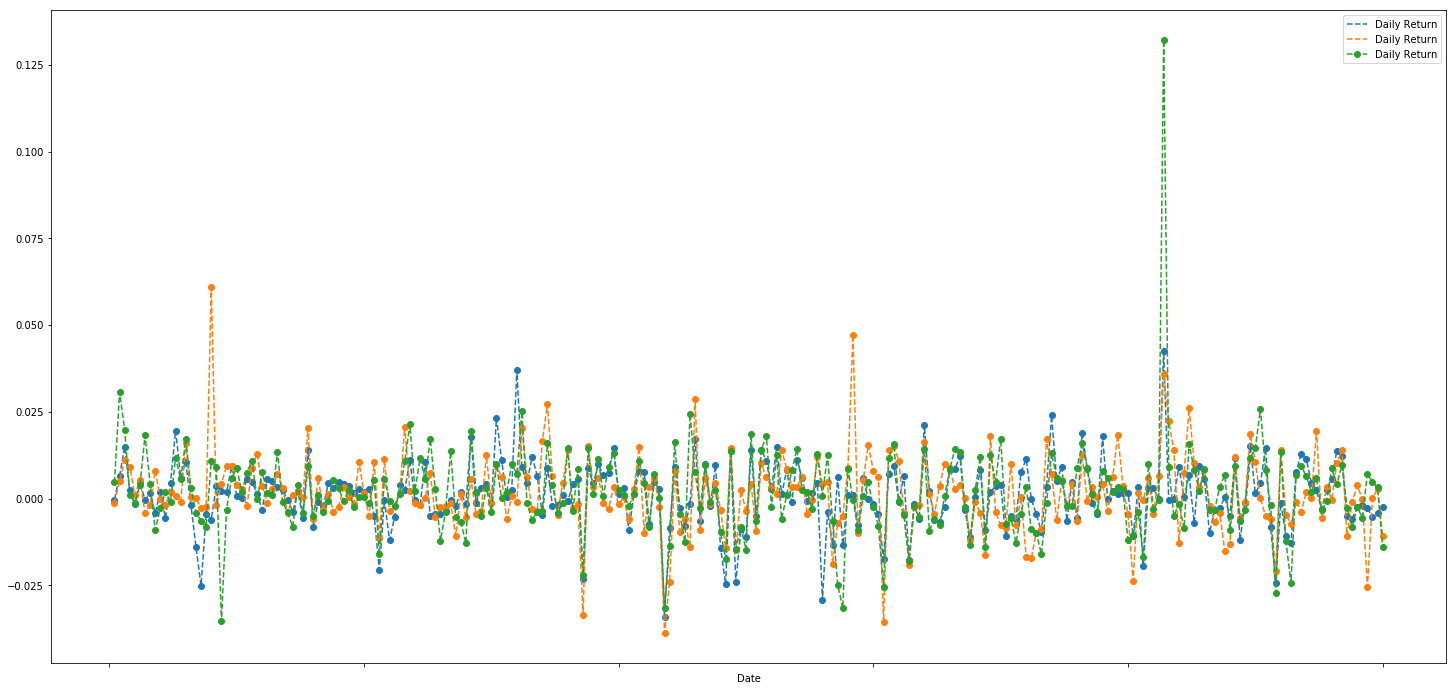

In [227]:
# Reading Google stock data and extracting the data for 2017
googl = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
googl1 = googl[googl['Date']>='2017-01-01'].copy() 
googl1.set_index('Date',inplace=True)

# Using pct_change to find the percent change for each day
googl1['Daily Return'] = googl1['Close'].pct_change()

# Plotting the daily return percentage
ax = googl1['Daily Return'].plot(figsize=(25,12), legend=True, linestyle='--', marker='o')

# Reading Apple stock data and extracting the data for 2017
aapl = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
aapl1 = aapl[aapl['Date']>='2017-01-01'].copy() 
aapl1.set_index('Date',inplace=True)

# Using pct_change to find the percent change for each day
aapl1['Daily Return'] = aapl1['Close'].pct_change()

# Plotting the daily return percentage
ax = aapl1['Daily Return'].plot(figsize=(25,12), legend=True, linestyle='--', marker='o')

# Reading the Amazon stock data extracted from 2017
amzn = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
amzn1 = amzn[amzn['Date']>='2017-01-01'].copy() 
amzn1.set_index('Date',inplace=True)
# Using pct_change to find the percent change for each day
amzn1['Daily Return'] = amzn1['Close'].pct_change()

# Plotting the daily return percentage
ax = amzn1['Daily Return'].plot(figsize=(25,12), legend=True, linestyle='--', marker='o')

## Google in blue and Apple in orange color

Looking at this data, makes it complex to make assumptions on the stock data. So, let us look at each of the stock data file individually

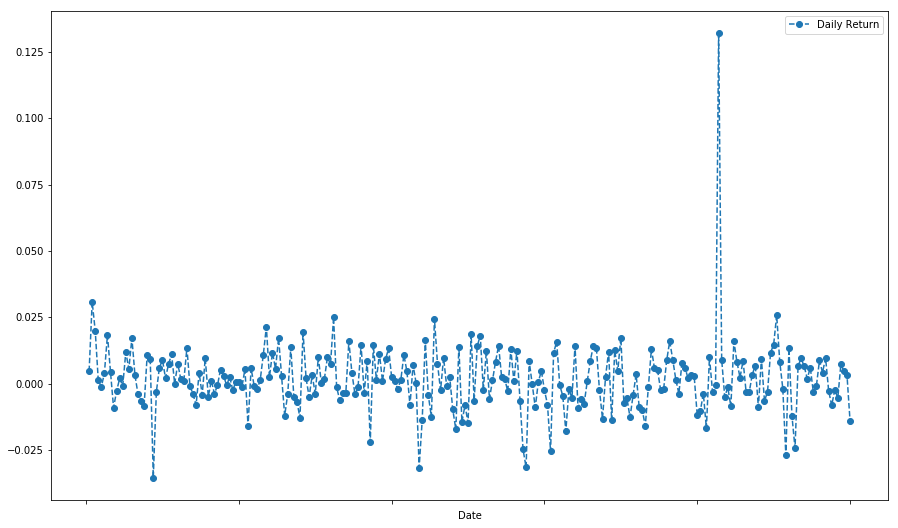

In [230]:
# Reading the Amazon stock data extracted from 2017
amzn = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
amzn1 = amzn[amzn['Date']>='2017-01-01'].copy() 
amzn1.set_index('Date',inplace=True)
# Using pct_change to find the percent change for each day
amzn1['Daily Return'] = amzn1['Close'].pct_change()

# Plotting the daily return percentage
ax = amzn1['Daily Return'].plot(figsize=(15,9), legend=True, linestyle='--', marker='o')

Looking at the daily returns of amazon, we can say that almost more than 60-65% of the times amazon can atleast get the minimum amount of 2-2.5% what they have had on the stocks

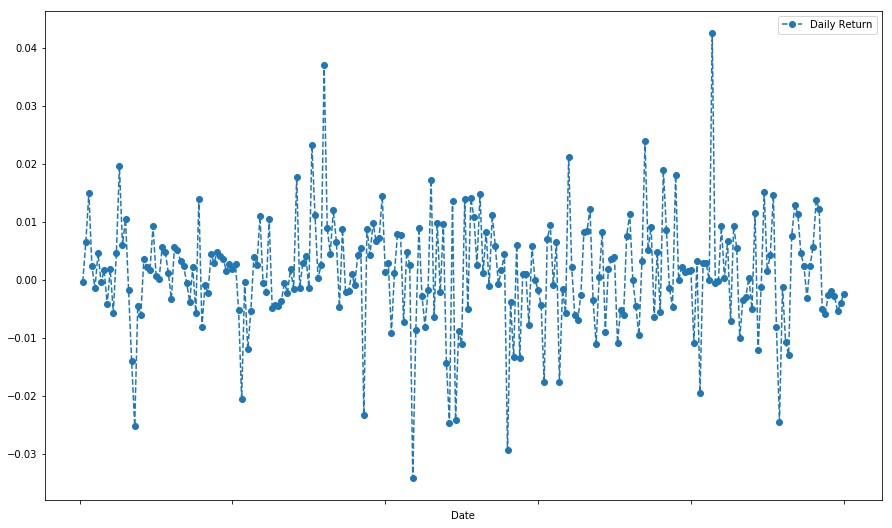

In [231]:
# Reading Google stock data and extracting the data for 2017
googl = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
googl1 = googl[googl['Date']>='2017-01-01'].copy() 
googl1.set_index('Date',inplace=True)

# Using pct_change to find the percent change for each day
googl1['Daily Return'] = googl1['Close'].pct_change()

# Plotting the daily return percentage
ax = googl1['Daily Return'].plot(figsize=(15,9), legend=True, linestyle='--', marker='o')

The daily returns on Google are almost most of the times close to 1, hence the percentage change of the stocks is reasonably good

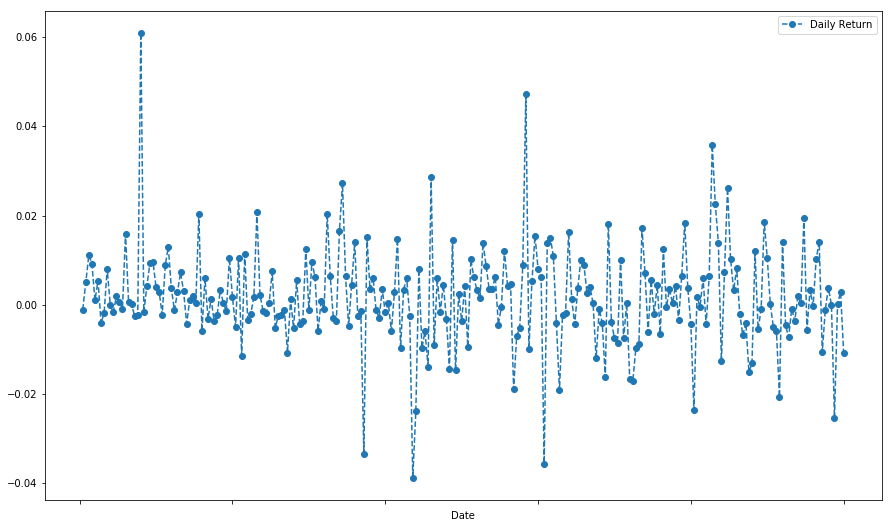

In [233]:
# Reading Apple stock data and extracting the data for 2017
aapl = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
aapl1 = aapl[aapl['Date']>='2017-01-01'].copy() 
aapl1.set_index('Date',inplace=True)

# Using pct_change to find the percent change for each day
aapl1['Daily Return'] = aapl1['Close'].pct_change()

# Plotting the daily return percentage
ax = aapl1['Daily Return'].plot(figsize=(15,9), legend=True, linestyle='--', marker='o')

Although apple seems to have some higher change in percentage frequencies at times, they are equally bad with the depletion on daily returns. There is about 2 percentage change on the daily returns of their stocks most of the times

#### Overall, considering the stocks of 2017, amazon has done slightly better than the other two companies

### Visualize the daily average return on Apple, Google and Amazon stocks 2017

C:\Users\kundankesidi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\kundankesidi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\kundankesidi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



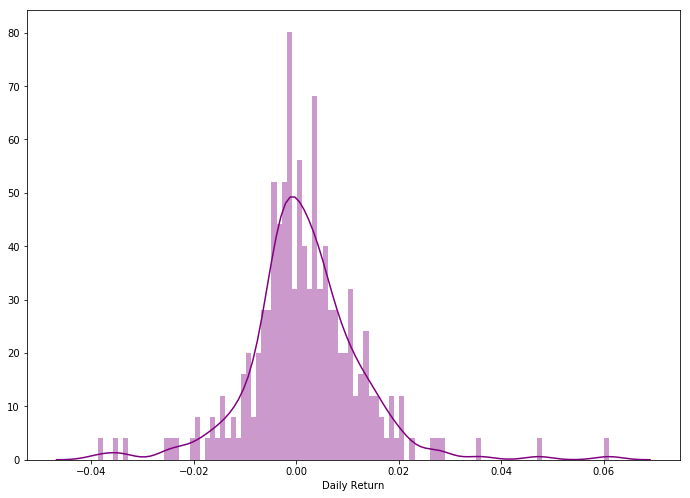

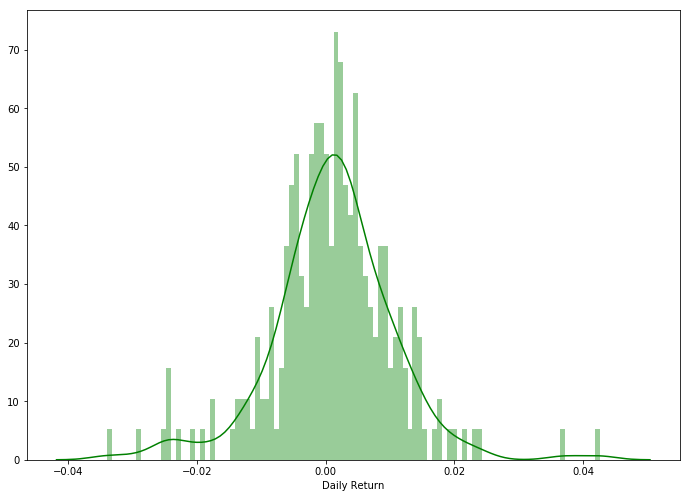

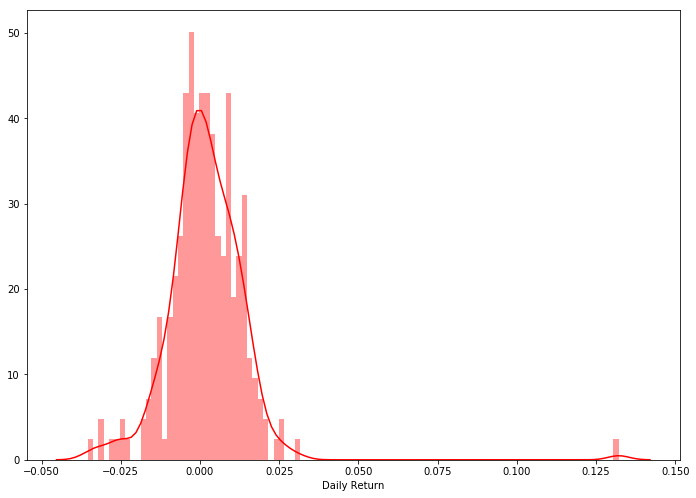

In [225]:
# Creating a Seaborn Distplot for Apple
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(aapl1['Daily Return'].dropna(), bins=100, color='purple')
# Creating a Seaborn Distplot for Google 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(googl1['Daily Return'].dropna(), bins=100, color='green')
#Plot for Amazon
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(amzn1['Daily Return'].dropna(), bins=100, color='red')



### 3. You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis

In [241]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

In [242]:
cd C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam

C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam


In [243]:
import os
os.getcwd()

'C:\\Users\\kundankesidi\\Desktop\\Programming for data science\\Mid Term Exam'

In [244]:
os.chdir(r"C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam\stock-time-series-20050101-to-20171231 (1)")

In [245]:
first_data = pd.read_csv('FCX_data.csv')

In [246]:
first_data.head(5)

,Date,OpenFCX,HighFCX,LowFCX,CloseFCX,Adj CloseFCX,VolumeFCX,NameFCX
0,2013-10-11,32.779999,33.580002,32.770000,33.439999,31.329409,9036800,FCX
1,2013-10-14,33.400002,34.139999,33.330002,33.869999,31.732271,9174900,FCX
2,2013-10-15,33.840000,34.340000,33.799999,34.040001,31.891542,10693000,FCX
3,2013-10-16,34.139999,34.330002,33.770000,34.130001,31.975863,9633500,FCX
4,2013-10-17,34.180000,34.830002,34.169998,34.709999,32.519257,14631000,FCX


In [247]:
second_data = pd.read_csv('FISV_data.csv')

In [248]:
second_data.head(5)

,Date,OpenFISV,HighFISV,LowFISV,CloseFISV,Adj CloseFISV,VolumeFISV,NameFISV
0,2013-10-11,24.907499,25.432501,24.907499,25.432501,25.432501,1182800,FISV
1,2013-10-14,25.334999,25.620001,25.290001,25.592501,25.592501,1232000,FISV
2,2013-10-15,25.517500,25.615000,25.427500,25.485001,25.485001,1425600,FISV
3,2013-10-16,25.645000,25.930000,25.592501,25.927500,25.927500,1771200,FISV
4,2013-10-17,25.817499,26.077499,25.782499,26.057501,26.057501,1663200,FISV


In [249]:
first_data.describe()

,OpenFCX,HighFCX,LowFCX,CloseFCX,Adj CloseFCX,VolumeFCX
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,18.777770,19.062714,18.471041,18.761690,18.302428,2.376676e+07
std,9.205110,9.221179,9.176764,9.202750,8.579231,1.703849e+07
min,3.770000,4.000000,3.520000,3.740000,3.718889,4.128300e+06
25%,12.000000,12.317500,11.770000,12.020000,11.949663,1.255465e+07
50%,15.490000,15.690000,15.185000,15.395000,15.351450,1.825675e+07
75%,22.804999,23.100000,22.462499,22.845000,22.401519,2.961300e+07
max,38.950001,39.320000,38.740002,39.040001,37.345387,1.415973e+08


In [250]:
second_data.describe()

,OpenFISV,HighFISV,LowFISV,CloseFISV,Adj CloseFISV,VolumeFISV
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,49.676187,50.038341,49.341379,49.713403,49.713403,2.085289e+06
std,15.233898,15.330147,15.129649,15.225792,15.225792,1.000062e+06
min,24.907499,25.432501,24.907499,25.432501,25.432501,5.542000e+05
25%,36.232501,36.561250,35.938751,36.203750,36.203750,1.473050e+06
50%,49.519998,49.980000,49.119999,49.602499,49.602499,1.869500e+06
75%,61.747500,62.134998,61.401251,61.793751,61.793751,2.394500e+06
max,82.660004,82.790001,81.669998,82.379997,82.379997,1.033200e+07


The mean, min and max of the FISV stock data file is higher than the FCX stock file. 

### aggregate the data based on minimum and maximum values

In [254]:
first_data.agg(['min','max'])

,Date,OpenFCX,HighFCX,LowFCX,CloseFCX,Adj CloseFCX,VolumeFCX,NameFCX
min,2013-10-11,3.770000,4.00,3.520000,3.740000,3.718889,4128300,FCX
max,2018-10-11,38.950001,39.32,38.740002,39.040001,37.345387,141597300,FCX


In [255]:
second_data.agg(['min','max'])

,Date,OpenFISV,HighFISV,LowFISV,CloseFISV,Adj CloseFISV,VolumeFISV,NameFISV
min,2013-10-11,24.907499,25.432501,24.907499,25.432501,25.432501,554200,FISV
max,2018-10-11,82.660004,82.790001,81.669998,82.379997,82.379997,10332000,FISV


Looking at the table, we can say that the data had minimum values on 2013-10-11 and a maximum values on 2018-10-11

### Moving averages over the time

In [258]:
first_data['OpenFCX_rolling'] = first_data['OpenFCX'].rolling(4).mean()

In [259]:
second_data['OpenFISV_rolling'] = second_data['OpenFISV'].rolling(4).mean()

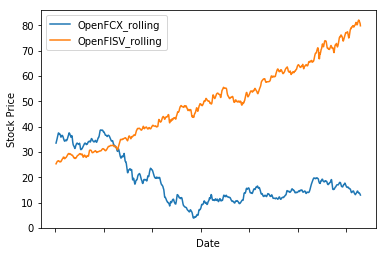

In [260]:
import matplotlib.pyplot as plt

ax = first_data.plot(x="Date", y=["OpenFCX_rolling"])
second_data.plot(x="Date", y=["OpenFISV_rolling"], ax=ax)
ax.set_ylabel("Stock Price")

plt.show()

Looking at the moving averages of the OpenFCX and OpenFCIV stock data files, we can conclude that the opening value of both the stocks are close to each other in the beginning days of 2013, but by the time we reached 2018, OpenFISV has significantly shown higher values than the FCX_data file

### 4. Take five stocks of your choice and create the same type of report stated in question 3.

In [332]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

In [333]:
cd C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam

C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam


In [334]:
import os
os.getcwd()

'C:\\Users\\kundankesidi\\Desktop\\Programming for data science\\Mid Term Exam'

In [335]:
os.chdir(r"C:\Users\kundankesidi\Desktop\Programming for data science\Mid Term Exam\stock-time-series-20050101-to-20171231 (1)")

In [336]:
a1 = pd.read_csv('A_data.csv')
a2 = pd.read_csv('FCX_data.csv')
a3 = pd.read_csv('FISV_data.csv')
a4 = pd.read_csv('DUK_data.csv')
a5 = pd.read_csv('ESS_data.csv')

In [337]:
a1.describe()

,OpenA,HighA,LowA,CloseA,Adj CloseA,VolumeA
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,48.746346,49.152294,48.337444,48.750025,47.674415,2.436500e+06
std,11.476119,11.535560,11.391111,11.449135,11.877276,1.435974e+06
min,33.180000,34.060001,33.119999,33.369999,32.404686,5.327000e+05
25%,40.139999,40.457499,39.738835,40.119999,38.577881,1.585800e+06
50%,42.580000,42.924227,42.355000,42.665001,41.137428,2.121300e+06
75%,60.152501,60.632499,59.679998,60.142500,59.473106,2.883475e+06
max,74.940002,75.000000,74.300003,74.820000,74.316177,2.494680e+07


In [338]:
a2.describe()

,OpenFCX,HighFCX,LowFCX,CloseFCX,Adj CloseFCX,VolumeFCX
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,18.777770,19.062714,18.471041,18.761690,18.302428,2.376676e+07
std,9.205110,9.221179,9.176764,9.202750,8.579231,1.703849e+07
min,3.770000,4.000000,3.520000,3.740000,3.718889,4.128300e+06
25%,12.000000,12.317500,11.770000,12.020000,11.949663,1.255465e+07
50%,15.490000,15.690000,15.185000,15.395000,15.351450,1.825675e+07
75%,22.804999,23.100000,22.462499,22.845000,22.401519,2.961300e+07
max,38.950001,39.320000,38.740002,39.040001,37.345387,1.415973e+08


In [339]:
a3.describe()

,OpenFISV,HighFISV,LowFISV,CloseFISV,Adj CloseFISV,VolumeFISV
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,49.676187,50.038341,49.341379,49.713403,49.713403,2.085289e+06
std,15.233898,15.330147,15.129649,15.225792,15.225792,1.000062e+06
min,24.907499,25.432501,24.907499,25.432501,25.432501,5.542000e+05
25%,36.232501,36.561250,35.938751,36.203750,36.203750,1.473050e+06
50%,49.519998,49.980000,49.119999,49.602499,49.602499,1.869500e+06
75%,61.747500,62.134998,61.401251,61.793751,61.793751,2.394500e+06
max,82.660004,82.790001,81.669998,82.379997,82.379997,1.033200e+07


In [340]:

a4.describe()


,OpenDUK,HighDUK,LowDUK,CloseDUK,Adj CloseDUK,VolumeDUK
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,77.626833,78.170794,77.081341,77.650246,69.753320,3.220550e+06
std,5.591576,5.576705,5.584848,5.589626,8.524985,1.207769e+06
min,66.040001,66.730003,65.500000,65.830002,54.005676,9.363000e+05
25%,72.897501,73.397501,72.309998,72.970003,62.169264,2.423075e+06
50%,77.505001,78.015000,76.920002,77.489998,70.728104,2.982900e+06
75%,81.865000,82.402451,81.312498,81.912502,76.835464,3.773750e+06
max,91.379997,91.800003,90.419998,91.089996,87.090042,1.556620e+07


In [341]:
a5.describe()

,OpenESS,HighESS,LowESS,CloseESS,Adj CloseESS,VolumeESS
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,218.916675,220.772063,217.014730,218.958143,204.039166,3.998028e+05
std,28.753681,28.877964,28.541787,28.692609,33.404073,5.508743e+05
min,140.919998,143.000000,137.529999,142.119995,122.499207,7.800000e+04
25%,207.197498,209.140004,205.407498,207.245002,188.509903,2.759500e+05
50%,225.550003,227.540001,223.225006,225.840004,208.106506,3.517000e+05
75%,236.155003,238.255001,234.112500,236.115002,229.349655,4.415250e+05
max,268.950012,270.040009,266.589996,269.390015,259.335236,1.895350e+07


In [342]:
a1.agg(['min','max'])

,Date,OpenA,HighA,LowA,CloseA,Adj CloseA,VolumeA,NameA
min,2013-10-11,33.180000,34.060001,33.119999,33.369999,32.404686,532700,A
max,2018-10-11,74.940002,75.000000,74.300003,74.820000,74.316177,24946800,A


In [343]:
a2.agg(['min','max'])

,Date,OpenFCX,HighFCX,LowFCX,CloseFCX,Adj CloseFCX,VolumeFCX,NameFCX
min,2013-10-11,3.770000,4.00,3.520000,3.740000,3.718889,4128300,FCX
max,2018-10-11,38.950001,39.32,38.740002,39.040001,37.345387,141597300,FCX


In [344]:
a3.agg(['min','max'])

,Date,OpenFISV,HighFISV,LowFISV,CloseFISV,Adj CloseFISV,VolumeFISV,NameFISV
min,2013-10-11,24.907499,25.432501,24.907499,25.432501,25.432501,554200,FISV
max,2018-10-11,82.660004,82.790001,81.669998,82.379997,82.379997,10332000,FISV


In [345]:
a4.agg(['min','max'])

,Date,OpenDUK,HighDUK,LowDUK,CloseDUK,Adj CloseDUK,VolumeDUK,NameDUK
min,2013-10-11,66.040001,66.730003,65.500000,65.830002,54.005676,936300,DUK
max,2018-10-11,91.379997,91.800003,90.419998,91.089996,87.090042,15566200,DUK


In [346]:
a5.agg(['min','max'])

,Date,OpenESS,HighESS,LowESS,CloseESS,Adj CloseESS,VolumeESS,NameESS
min,2013-10-11,140.919998,143.000000,137.529999,142.119995,122.499207,78000,ESS
max,2018-10-11,268.950012,270.040009,266.589996,269.390015,259.335236,18953500,ESS


#### Looking at all the stocks min and max values, we can say that FCX has the least min and max values among all other stock files

### Moving averages over the time

<Figure size 2772x1476 with 0 Axes>

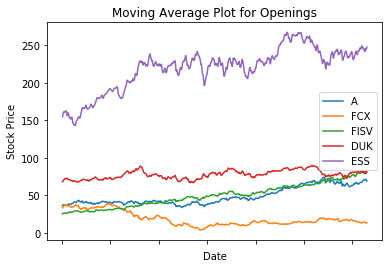

In [347]:
first_data = pd.read_csv('A_data.csv')
first_data2 = first_data[first_data['Date']>='2017-09-01']
date_range = first_data2['Date']
second_data = pd.read_csv('FCX_data.csv')
second_data2 = second_data[second_data['Date']>='2017-09-01']
date_range = second_data2['Date']
third_data = pd.read_csv('FISV_data.csv')
third_data2 = third_data[third_data['Date']>='2017-09-01']
date_range = third_data2['Date']
fourth_data = pd.read_csv('DUK_data.csv')
fourth_data2 = fourth_data[third_data['Date']>='2017-09-01']
date_range = fourth_data2['Date']
five_data = pd.read_csv('ESS_data.csv')
five_data2 = five_data[third_data['Date']>='2017-09-01']
date_range = five_data2['Date']
first_data['A'] = first_data['OpenA'].rolling(4).mean()
second_data['FCX'] = second_data['OpenFCX'].rolling(4).mean()
third_data['FISV'] = third_data['OpenFISV'].rolling(4).mean()
fourth_data['DUK'] = fourth_data['OpenDUK'].rolling(4).mean()
five_data['ESS'] = five_data['OpenESS'].rolling(4).mean()
# Plotting the Moving average Plot
fig = plt.figure()
fig.set_size_inches(38.5, 20.5)
ax = first_data.plot(x="Date", y=["A"], title ="Moving Average Plot for Openings")
second_data.plot(x="Date", y=["FCX"], ax=ax)
third_data.plot(x="Date", y=["FISV"], ax=ax)
fourth_data.plot(x="Date", y=["DUK"], ax=ax)
five_data.plot(x="Date", y=["ESS"], ax=ax)
ax.set_ylabel("Stock Price")
plt.show()

The moving average of ESS is higher than the FISV,DUK,A and FCX files 